<a href="https://colab.research.google.com/github/tharindatj/HandsOnMachinerLearning/blob/master/classification_chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Liabraris

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Download the Dataset from MINST

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X,y= mnist['data'], mnist['target']
X.shape

(70000, 784)

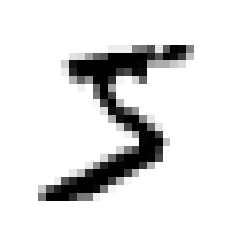

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [5]:
y =y.astype(np.uint8)
y[0]

5

Traning and Test Set

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training the binary classifier, for 5

In [7]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

Model Evaluation

*Cross Validation Scores* 

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [11]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

*Confusion Matrix*

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

*Precision and recall scores*

In [13]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [14]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [15]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

*Checking and Varying Threshols*

In [16]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [17]:
threshold = 3000 
y_some_digit_pred = y_scores > threshold
y_some_digit_pred

array([False])

*Deciding which threshold to use*

*Precision Recall Curve*

In [18]:
#by using method=decision function you get the scores for prediciton instead of the predcition
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

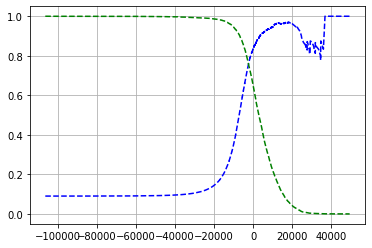

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='precisions')
  plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')
  plt.grid(b=True)

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

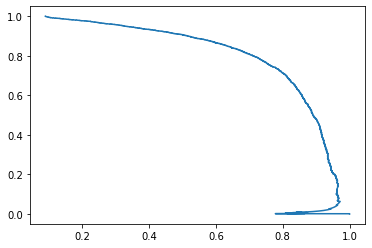

In [21]:
plt.plot(precisions, recalls)
plt.show()

In [22]:
threshold_90_precision = thresholds[np.argmax(precisions >=0.9)]
threshold_90_precision

3370.0194991439557

In [23]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [24]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [25]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

*ROC Curve*

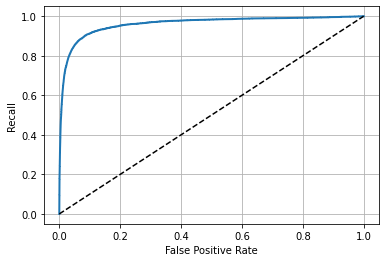

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')
  plt.grid(b=True)
  plt.xlabel("False Positive Rate")
  plt.ylabel('Recall')
  [...]

plot_roc_curve(fpr, tpr)
plt.show()

*Measuring the area under the curve*

In [27]:
#ROC score closer to 1 the more accurate the classifier
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [28]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

Training a RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method='predict_proba')
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

ROC curve for RandomForestClassifier

In [30]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

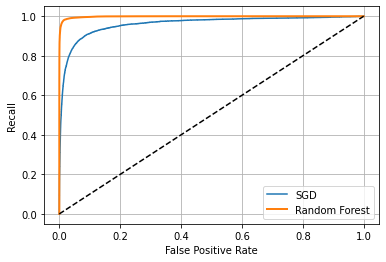

In [31]:
plt.plot(fpr, tpr, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc='lower right')
plt.show()

In [32]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [36]:
y_pred_rf = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
# forest_clf.fit(X_train, y_train_5)
# y_pred_rf = forest_clf.predict(X_train)
precision_score(y_train_5, y_pred_rf)

0.9905083315756169

In [37]:
recall_score(y_train_5, y_pred_rf)

0.8662608374838591

My Structure for Evaluation

Import Models

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

SGD_classifier = SGDClassifier()
RF_classifier = RandomForestClassifier()

Cross validation predictions for the models

In [42]:
from sklearn.model_selection import cross_val_predict

y_pred_SGD = cross_val_predict(SGD_classifier, X_train, y_train_5, cv=3)
y_pred_RF = cross_val_predict(RF_classifier,X_train, y_train_5, cv=3)

Calculating Precision, recall and F1 scores

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#precision scores
precision_score_SGD = precision_score